
#  CAR PRICE PREDICTION USING ML

# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Dataset

In [2]:
df=pd.read_csv(r"D:\anjali\CarPricesPrediction.csv")
df

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...,...
995,995,Nissan,Camry,2010,149032,Excellent,24548.50
996,996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,997,Ford,Altima,2016,109851,Good,20507.55
998,998,Toyota,Silverado,2010,11704,Good,31414.90


In [3]:
#To find rows andcolumns
df.shape

(1000, 7)

In [4]:
#Returns the infomation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Make        1000 non-null   object 
 2   Model       1000 non-null   object 
 3   Year        1000 non-null   int64  
 4   Mileage     1000 non-null   int64  
 5   Condition   1000 non-null   object 
 6   Price       1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
df.describe()# CHECK STATISTICS OF DATASET

,Unnamed: 0,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [7]:
#checking missing value
df.isna().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [8]:
#Returns rows
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [9]:
df.tail()

,Make,Model,Year,Mileage,Condition,Price
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90
999,Nissan,Silverado,2017,128390,Excellent,18580.60


In [10]:
#check the duplication
print(df.duplicated().sum()) 

0


In [11]:
#Returns the index of columns
df.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

In [12]:
#Returns the different datatypes
df.dtypes

Make          object
Model         object
Year           int64
Mileage        int64
Condition     object
Price        float64
dtype: object

In [13]:
#Check the number of unique values in each column
df.nunique()

Make           5
Model          5
Year          13
Mileage      993
Condition      3
Price        997
dtype: int64

In [14]:
df.corr()

,Year,Mileage,Price
Year,1.000000,-0.01685,-0.883093
Mileage,-0.016850,1.00000,-0.454250
Price,-0.883093,-0.45425,1.000000


<AxesSubplot:>

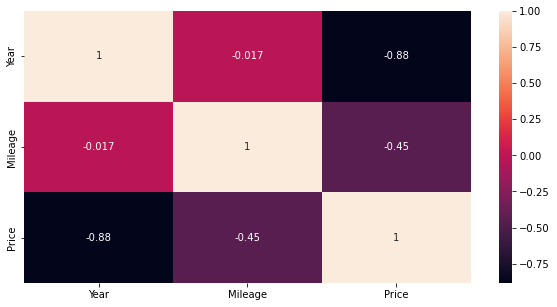

In [15]:
#Returns the heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

# VISUALIZATION

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

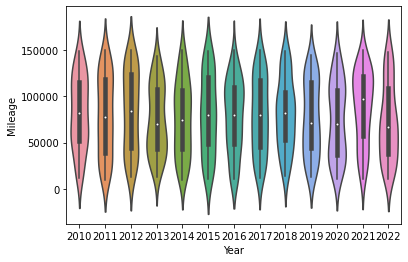

In [16]:
sns.violinplot(x='Year',y='Mileage',data=df)

<AxesSubplot:xlabel='Model', ylabel='Price'>

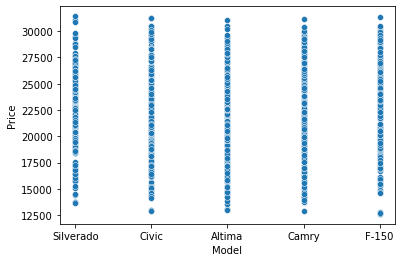

In [17]:
sns.scatterplot(data=df,x='Model',y='Price')

Text(0.5, 1.0, 'boxplot of year')

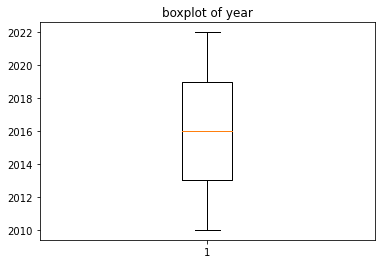

In [20]:
plt.boxplot(df['Year'])
plt.title('boxplot of year')

Text(0.5, 1.0, 'boxplot of mileage')

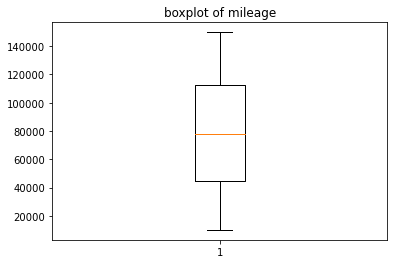

In [21]:
plt.boxplot(df['Mileage'])
plt.title('boxplot of mileage')

In [22]:
# ENCODING CATEGORICAL FEATURES
#Label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Make','Model','Condition']
for i in list:
    df[i]=le.fit_transform(df[i])
df.head()

,Make,Model,Year,Mileage,Condition,Price
0,1,4,2022,18107,0,19094.75
1,4,4,2014,13578,0,27321.10
2,0,2,2016,46054,2,23697.30
3,1,2,2022,34981,0,18251.05
4,0,2,2019,63565,0,19821.85


In [23]:
#Data seperation
x=df.drop(['Price'],axis=1)
x

,Make,Model,Year,Mileage,Condition
0,1,4,2022,18107,0
1,4,4,2014,13578,0
2,0,2,2016,46054,2
3,1,2,2022,34981,0
4,0,2,2019,63565,0
...,...,...,...,...,...
995,3,1,2010,149032,0
996,0,3,2014,20608,0
997,1,0,2016,109851,2
998,4,4,2010,11704,2


In [24]:
y=df['Price']
y

0      19094.75
1      27321.10
2      23697.30
3      18251.05
4      19821.85
         ...   
995    24548.50
996    26969.70
997    20507.55
998    31414.90
999    18580.60
Name: Price, Length: 1000, dtype: float64

In [25]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[-0.68639356,  1.45631611,  1.62276745, -1.52401733, -0.7816225 ],
       [ 1.41266931,  1.45631611, -0.49331073, -1.63774748, -0.7816225 ],
       [-1.38608118,  0.06404449,  0.03570882, -0.82222522,  1.46119672],
       ...,
       [-0.68639356, -1.32822713,  0.03570882,  0.7798155 ,  1.46119672],
       [ 1.41266931,  1.45631611, -1.55134981, -1.6848065 ,  1.46119672],
       [ 0.71298169,  1.45631611,  0.30021859,  1.24535828, -0.7816225 ]])

In [26]:
M=pd.DataFrame(x1,columns=[x])
M

,Make,Model,Year,Mileage,Condition
0,-0.686394,1.456316,1.622767,-1.524017,-0.781622
1,1.412669,1.456316,-0.493311,-1.637747,-0.781622
2,-1.386081,0.064044,0.035709,-0.822225,1.461197
3,-0.686394,0.064044,1.622767,-1.100285,-0.781622
4,-1.386081,0.064044,0.829238,-0.382497,-0.781622
...,...,...,...,...,...
995,0.712982,-0.632091,-1.551350,1.763711,-0.781622
996,-1.386081,0.760180,-0.493311,-1.461213,-0.781622
997,-0.686394,-1.328227,0.035709,0.779815,1.461197
998,1.412669,1.456316,-1.551350,-1.684807,1.461197


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape

(800, 5)

In [29]:
y_train.shape

(800,)

In [30]:
x_train

,Make,Model,Year,Mileage,Condition
29,2,3,2011,134672,1
535,0,3,2015,26418,1
695,1,3,2013,102622,0
557,0,0,2010,100958,0
836,2,0,2010,68159,0
...,...,...,...,...,...
106,0,2,2011,22840,0
270,3,4,2018,81973,1
860,2,2,2014,10120,0
435,0,3,2021,102564,0


In [31]:
y_train

29     24266.50
535    25679.20
695    23868.90
557    26952.20
836    28592.15
         ...   
106    29857.90
270    19901.35
860    27494.10
435    15871.90
102    22461.10
Name: Price, Length: 800, dtype: float64

In [32]:
x_test

,Make,Model,Year,Mileage,Condition
521,4,0,2010,29791,0
737,4,3,2015,50227,1
740,3,3,2011,10893,0
660,4,4,2011,124052,0
411,0,1,2014,121589,0
...,...,...,...,...,...
408,4,3,2021,18104,0
332,0,1,2019,97616,1
208,2,4,2014,18854,2
613,3,1,2018,65718,0


# MODEL BUILDING AND EVALUATION

# LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score
lr=LinearRegression() 
model1=lr.fit(x_train,y_train) 
y_pred=model1.predict(x_test)
print('LinearRegression') 
print('MSE=',mean_squared_error(y_test,y_pred))



LinearRegression
MSE= 0.004725039350788652


In [34]:
print('LinearRegression')
print('r2_score = ',r2_score(y_test,y_pred))

LinearRegression
r2_score =  0.9999999997668163


# DECISIONTREE REGRESSION

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
model1=dt.fit(x_train,y_train)
y_pred_dt=model1.predict(x_test)

In [37]:

print('DecisionTreeRegressor')
print('MSE =',mean_squared_error(y_test,y_pred))
print('r2_score =',r2_score(y_test,y_pred))

DecisionTreeRegressor
MSE = 0.004725039350788652
r2_score = 0.9999999997668163


# RANDOMFOREST REGRESSION

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf_re=RandomForestRegressor()
model3=rf_re.fit(x_train,y_train)
y_pred_rf=model3.predict(x_test)

In [39]:
print('RANDOMFOREST REGRESSOR')
print('MSE =',mean_squared_error(y_test,y_pred_rf))
print('r2_score =',r2_score(y_test,y_pred_rf))

RANDOMFOREST REGRESSOR
MSE = 14347.538552737728
r2_score = 0.9992919399846516


# GRADIENT BOOSTING REGRESSOR

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_re=GradientBoostingRegressor()
model4=gbr_re.fit(x_train,y_train)
y_pred_gbr=model4.predict(x_test)


In [41]:
print('GRADIENTBOOSTING REGRESSOR')
print('MSE=',mean_squared_error(y_test,y_pred_gbr))
print('r2_score=',r2_score(y_test,y_pred_gbr))


GRADIENTBOOSTING REGRESSOR
MSE= 20781.911037617694
r2_score= 0.9989743996718199


# ADABOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ab_re=AdaBoostRegressor()
model5=ab_re.fit(x_train,y_train)
y_pred_ab=model5.predict(x_test)

In [ ]:
print('ADABOOST REGRESSOR')
print('MSE =',mean_squared_error(y_test,y_pred_ab))
print('r2_score =',r2_score(y_test,y_pred_ab))

# XGBOOST REGRESSOR

In [42]:
from xgboost import XGBRegressor
xgb_re=XGBRegressor()
model6=xgb_re.fit(x_train,y_train)
y_pred_xgb=model6.predict(x_test)

In [43]:
print('XGBOOST REGRESSOR')
print('MSE =',mean_squared_error(y_test,y_pred_xgb))
print('r2_score =',r2_score(y_test,y_pred_xgb))

XGBOOST REGRESSOR
MSE = 21234.162999454504
r2_score = 0.9989520807541977


In [44]:
df.tail()

,Make,Model,Year,Mileage,Condition,Price
995,3,1,2010,149032,0,24548.50
996,0,3,2014,20608,0,26969.70
997,1,0,2016,109851,2,20507.55
998,4,4,2010,11704,2,31414.90
999,3,4,2017,128390,0,18580.60


# PREDICTION

In [45]:
print(model1.predict([[1,4,2022,18107,0]]))

[19094.75]


In [46]:
print(model1.predict([[4,4,2010,11704,2]]))

[30850.4]


In [47]:
print(model1.predict([[3,4,2017,128390,0]]))

[18580.6]
